# **PYTHON SENTIMENT ANALYSIS**


> #### **NAME: OISHI BASAK , REGISTRATION NUMBER: 20BAI10092**


***Python sentiment analysis is a way for examining text to find the sentiment that is concealed therein. Integrating machine learning and natural language processing allows it to achieve this. Using sentiment analysis, you can look at the emotions portrayed in a text. As part of this machine learning project, we create a binary text classifier to categorise the text's sentiment. The data is cleaned using a variety of NLP preprocessing methods, and the text classifier is constructed using LSTM layers.***

###**Aim of the project:**  
***To build a machine learning model to accurately classify whether customers are saying positive or negative***

### **Tools and Libraries used**
Python – 3.x  
Pandas – 1.2.4  
Matplotlib – 3.3.4  
TensorFlow – 2.4.1  
To install the above modules into your local machine, run the following command in your command line.


```
 pip install pandas matplotlib tensorflow
```



### **Steps to build Sentiment Analysis Text Classifier in Python:**
**1. Data Preprocessing**  
**2. Building the Text Classifier**  
**3. Training the Sentiment Analysis model - Neural Network**  
**4. Python Sentiment Analysis Output**

In [1]:
#importing functions
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/content/Tweets.csv")

#### ***There are more than 14,000 data samples in the sentiment analysis dataset.Let’s check the column names.***

In [2]:
review_df = df[['text','airline_sentiment']]  #preparing dataframe from the dataset
print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### **1. Data Preprocessing**

In [3]:
review_df = df[['text','airline_sentiment']]  #We only need the text and sentiment column.
#selecting important columns from the dataframe in the dataset
print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
# filtering out reviews ("positive" or "negative") from "neutral" 
# from the "airline_sentiment" column in the dataframe of the dataset
print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


#### *As we are dealing with the text data, we need to preprocess it using word embeddings.*:

In [6]:
review_df["airline_sentiment"].value_counts()   #counting the airline sentiment ("positive" and "negative")
# from the "airline_sentiment" column in the dataframe of the dataset

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

#### *The labels for this dataset are categorical. Machines understand only numeric data. So we need to convert the categorical data values to numeric  values using the factorize() method. This returns an array of numeric values and an Index of categories.*

In [7]:
sentiment_label = review_df.airline_sentiment.factorize()  #encoding
sentiment_label  #labeling positive sentiment as 0 and negative sentiment as 1

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [8]:
tweet = review_df.text.values

#### *Our machine learning model should be able to interpret the text data that we currently have. Basically, we have to transform the text into an array of vector embeddings. Word embeddings are a great method to demonstrate how the words in a text relate to one another.*

#### *To accomplish this, we first assign a different number to each of the distinctive words before replacing the word in question with the number. We will collect all the dataset's text data first.*

#### *We will tokenize all the words in the text with the help of Tokenizer. In tokenization, we break down all the words/sentences of a text into small parts called tokens.*

In [9]:
#importing essential NLP libraries
from keras.layers.normalization import layer_normalization
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### *The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.*

#### *Now, replace the words with their assigned numbers using the text_to_sequence() method. Each of the sentences in the dataset is not of equal length, so we use padding to pad the sentences to have equal length.*

In [10]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

### **2. Build the Text Classifier**
*For sentiment analysis project, we use LSTM layers in the machine learning model. The architecture of our model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, we introduced the Dropout mechanism in-between the LSTM layers.*

*LSTM stands for Long Short Term Memory Networks. It is a variant of Recurrent Neural Networks. Recurrent Neural Networks are usually used with sequential data such as text and audio. Usually, while computing an embedding matrix, the meaning of every word and its calculations (which are called hidden states) are stored. If the reference of a word, let’s say a word is used after 100 words in a text, then all these calculations RNNs cannot store in its memory. That’s why RNNs are not capable of learning these long-term dependencies.*

*LSTMs on the other hand work well with such text. LSTM networks work well with time-series data.*



In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

#### *Dropout is one of the regularization techniques which is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, any number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model, avoiding overfitting.*

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

#preparing our Binary Text Classifier Sequential model
vocab_size =25768
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           824576    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 841,227
Trainable params: 841,227
Non-trainable params: 0
__________________________________________________

## **3. Train the sentiment analysis model**

#### Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [13]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)  #training our model

Epoch 1/5
289/289 [==============================] - 90s 281ms/step - loss: 0.4012 - accuracy: 0.8307 - val_loss: 0.2097 - val_accuracy: 0.9229
Epoch 2/5
289/289 [==============================] - 76s 262ms/step - loss: 0.2234 - accuracy: 0.9152 - val_loss: 0.1643 - val_accuracy: 0.9411
Epoch 3/5
289/289 [==============================] - 74s 256ms/step - loss: 0.1614 - accuracy: 0.9420 - val_loss: 0.1640 - val_accuracy: 0.9411
Epoch 4/5
289/289 [==============================] - 78s 269ms/step - loss: 0.1338 - accuracy: 0.9496 - val_loss: 0.1717 - val_accuracy: 0.9459
Epoch 5/5
289/289 [==============================] - 75s 259ms/step - loss: 0.1155 - accuracy: 0.9565 - val_loss: 0.1725 - val_accuracy: 0.9446


### **Summary: The python sentiment analysis model obtained 96% accuracy on the training set and 94.33% accuracy on the test set.**

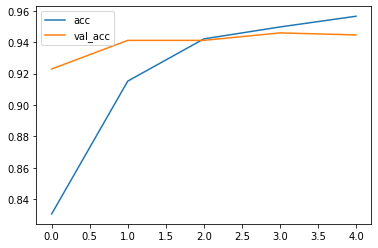

<Figure size 432x288 with 0 Axes>

In [14]:
#data visualization
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
#plotting the above achieved metrics using matplotlib.
plt.savefig("Accuracy plot.jpg")

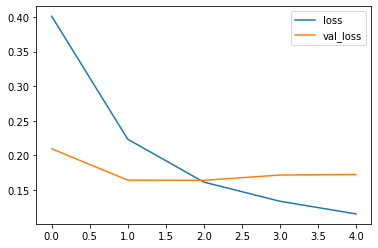

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

## **4. Python Sentiment Analysis Output**

#### Now we will execute this sentiment analysis model by defining a function that will take a text as input and output its prediction label as "positive" or "negative".

In [16]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

#Testing our model for predicting sentiments from the test sentences
test_sentence1 = "I really enjoyed the concert."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

test_sentence3 = "This is the worst food I have ever eaten."
predict_sentiment(test_sentence3)

test_sentence4 = "You are an angel!"
predict_sentiment(test_sentence4)

test_sentence5 = "You have been such a disobedient boy!"
predict_sentiment(test_sentence5)

Predicted label:  positive
Predicted label:  negative
Predicted label:  negative
Predicted label:  positive
Predicted label:  negative


## **In conclusion, we have built a Python sentiment analysis model efficiently. We developed a binary text classifier in this machine learning project to classify tweet sentiment into positive and negative. On validation, we achieved an accuracy of over 94%.**